<h1 align=center><font size = 7>House Sales in King County, USA</font></h1>

<h2 align=center>This dataset contains house sale prices for King County (Seattle and surroundings).</h2>
<h2 align=center>Includes homes sold from May 2014 - May 2015.</h2>

Objectives:

- Explore the sales dataset and make predictions of the price from home features.
- Find out which regression method and processing scores highest on this data set.



Features in the dataset:

<b>id</b>: a notation for a house

<b> date</b>: Date house was sold

<b>price</b>: Price is prediction target

<b>bedrooms</b>: Number of Bedrooms/House

<b>bathrooms</b>: Number of bathrooms/bedrooms

<b>sqft_living</b>: square footage of the home

<b>sqft_lot</b>: square footage of the lot

<b>floors</b>: Total floors (levels) in house

<b>waterfront</b>: House which has a view to a waterfront

<b>view</b>: Has been viewed

<b>condition</b> :How good the condition is  Overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system

<b>sqft_above</b>: square footage of house apart from basement

<b>sqft_basement</b>: square footage of the basement

<b>yr_built</b>: Built Year

<b>yr_renovated</b>: Year when house was renovated

<b>zipcode</b>: zip code

<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b>: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

<b>sqft_lot15</b>: lotSize area in 2015(implies-- some renovations)

In [1]:
# Import libraries for data wrangling and exploration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

# 1 Importing the Data 

In [2]:
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

In [3]:
# Display the first 5 columns of the dataframe.
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# What data types are in the feature columns?
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Summary statistics of the dataframe
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2 Data Wrangling

In [6]:
# Drop the two original columns "Unnamed: 0" and "id" from dataframe
df.drop(["Unnamed: 0","id"], axis = 1, inplace=True)

# Show the result
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Elimination of missing values (NaN) that may cause hickkups in the analyses later.

In [7]:
# Find out if there are any missing values (NaN) in the feature columns? There are two such columns!
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 13
Number of NaN values for the column bathrooms : 10


In [8]:
# Replace the missing (NaN) values in bedrooms with the mean number of bedrooms in the dataframe
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [9]:
# Replace the missing (NaN) values in bathrooms with the mean number of bedrooms in the dataframe
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [10]:
# Check how many missing (NaN) values we have now
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 0
Number of NaN values for the column bathrooms : 0


# 3 Exploratory data analysis

In [11]:
# Analyze the floors feature column and show how many houses have how many floors
floor_counts = df['floors'].value_counts().to_frame()

# Rename dataframe columns
floor_counts.rename(columns={'floors': 'value_counts'}, inplace=True)
floor_counts.index.name = 'floors'

#show dataframe
floor_counts

,value_counts
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


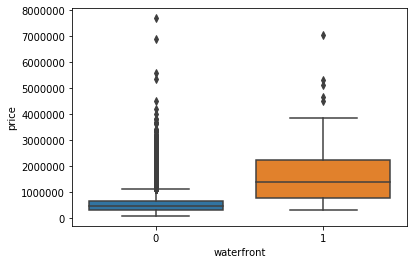

In [12]:
# Boxplot of housing prices showing outliers and quartiles.
# Does the pring distribution differ between waterfront and non-waterfront? The waterfront feature is a 1-0 coded integer.
sns.boxplot(x="waterfront", y="price", data=df)

(0, 8086179.629080753)

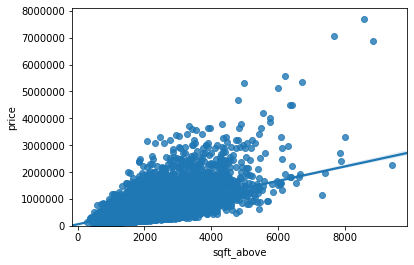

In [13]:
# How does house area (ignoring basement) correlate with price?
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

In [14]:
# Use the Pandas corr() method to find which features are most strongly correlated with Price (1 = strongly correlated, -1 = negatively correlated)
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

# 4: Model Development

In [15]:
# Import libraries for modeling
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**Linear Regressions**

In [16]:
# Linear regression of longitude (east-west coordinates) and price. Goodness of fit R2 (1.0 = perfect fit)
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('R2 score = ',lm.score(X, Y))

R2 score =  0.00046769430149007363


In [17]:
# Linear regression of house area (sqft_living) and price. Goodness of fit R2 (1.0 = perfect fit)
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('R2 score = ',lm.score(X, Y))

R2 score =  0.49285321790379316


In [18]:
# Linear regression of a list of feates and price (Multiple Linear Regression). Goodness of fit R2 (1.0 = perfect fit)
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm = LinearRegression()
lm.fit(Z, df['price'])
Y_hat = lm.predict(Z)
print('R2 score = ', lm.score(Z, df['price']))

R2 score =  0.6576951666037494


**SciKit-Learn Analytics Data Pipeline estimator for price prediction**

In [19]:
# Create estimator tuple
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [20]:
# Create a Pipeline object to predict price
pipe = Pipeline(Input)

# Show pipeline settings
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [21]:
# Input features Z and Y
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']

In [22]:
# Execute pipeline
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)

print(ypipe[0:4])
print(Y[0:4])

[349643.25 559093.25 449229.25 393313.25]
0    221900.0
1    538000.0
2    180000.0
3    604000.0
Name: price, dtype: float64


In [23]:
# Goodness of fit for pipeline estimator
print("R2 score = ",pipe.score(Z,Y))

R2 score =  0.7513404614351351


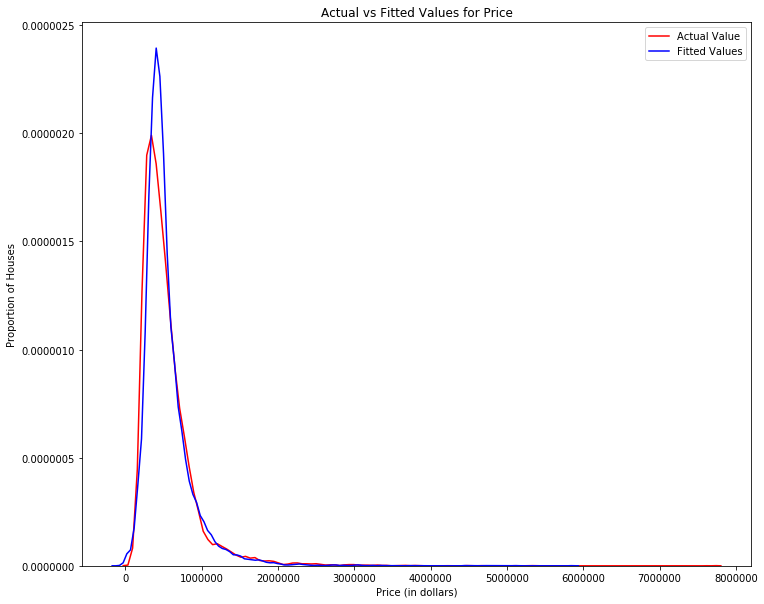

In [24]:
# Compare actual prices vs model fit prices

#plot size
width = 12
height = 10
plt.figure(figsize=(width, height))

#plot settings, nested curve and second curve
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)

#labeling
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

#execute
plt.show()
plt.close()

# 5: MODEL EVALUATION AND REFINEMENT

In [25]:
# Import libraries for evaluation and refinement
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("Libraries Imported")

Libraries Imported


**Split the data into training and testing set**

In [26]:
# Use only the features as in the pipeline above
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

#split in train = 85%, test = 15%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 3242
Number of training samples: 18371


**Create and fit a Ridge regression object using the training data.**

In [27]:
# Import necessary Ridge library
from sklearn.linear_model import Ridge

In [28]:
# Set regularization alpha for generalization of the model
RidgeModel=Ridge(alpha=0.1)

# Fit ridge to train
RidgeModel.fit(x_train, y_train)

# Make predictions for test (yhat)
yhat = RidgeModel.predict(x_test)

# Obtain R2 score on test set predictions
print("R2 score = ",RidgeModel.score(x_test, y_test))

R2 score =  0.6478759163939115


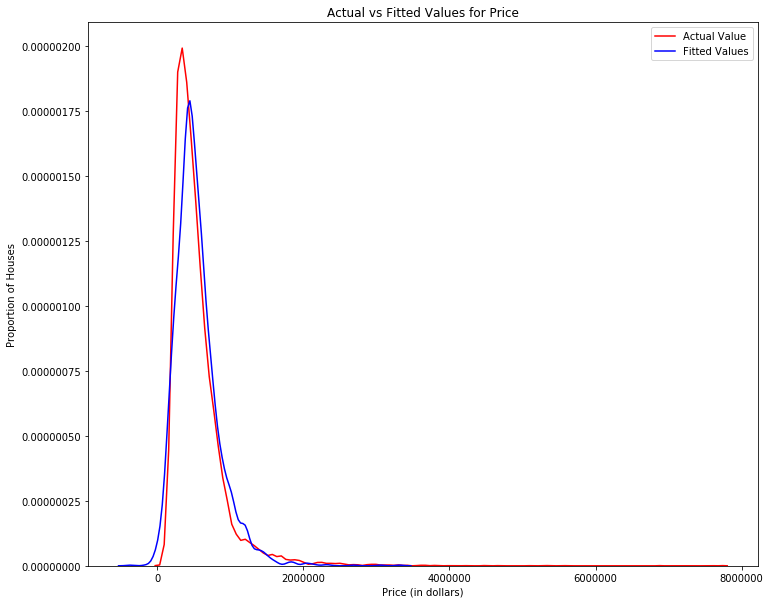

In [29]:
# Plot size settings
width = 12
height = 10
plt.figure(figsize=(width, height))

# Plot actual price vs predictions (yhat)
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Plot labeling
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

# Execute
plt.show()
plt.close()

**Second order polynomial transform on training and testing data. Use a Ridge regression object on the training data and regularisation parameter 0.1.**

In [30]:
# Second order polynomial transform settings
pr = PolynomialFeatures(degree=2)

# Tranform x train and test and our feature selection
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

# Regularization alpha settings
RidgeModel2 = Ridge(alpha=0.1)

# Fit the model on train
RidgeModel2.fit(x_train_pr, y_train)

# Make prediction on test set
yhat2 = RidgeModel2.predict(x_test_pr)

# Obtain Goodness of Fit R2 score
print("R2 score = ",RidgeModel2.score(x_test_pr, y_test))

R2 score =  0.7002744265869922


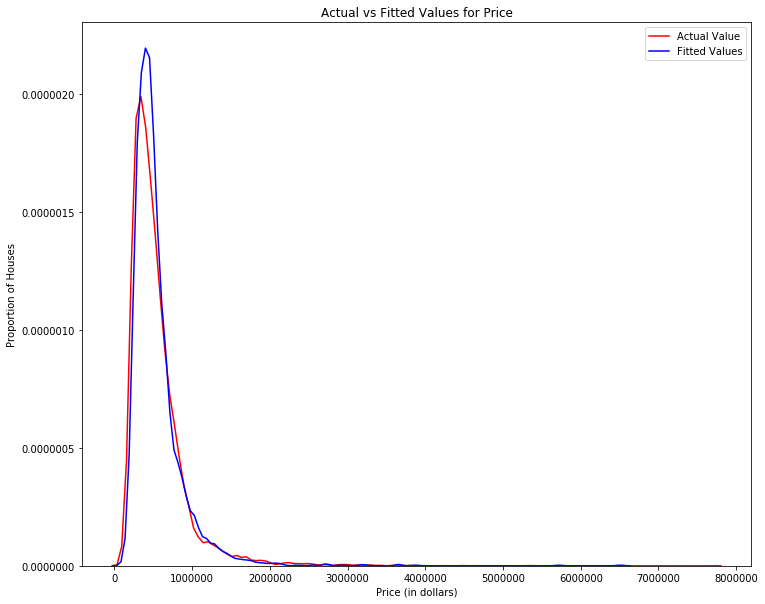

In [31]:
# Plot size settings
width = 12
height = 10
plt.figure(figsize=(width, height))

# Plot actual price vs predictions (yhat)
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Plot labeling
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

# Execute
plt.show()
plt.close()